# **Otimização**
## **Lista de Exercícios 01-A | Questão 1**
**Aluno:** André Paiva Conrado Rodrigues

In [96]:
# Importação de dependências
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Problema de Otimização:**

\begin{equation*}
\begin{aligned}
\text{Minimizar} \\
&& f(\mathit{\bm{x}}) = 2x_{1} + x_{2}^{2} - 2\\
\text{Sujeito a} \\
c_{1}: && -(x_{1} + 3)^{2} - x_{2}^{2} + 9 \geq 0 \\
c_{2}: && -3x_{1} - 2x_{2} - 6 \geq 0 \\
\end{aligned}
\end{equation*}

**Trabalhando na primeira restrição:**
\begin{equation*}
\begin{aligned}
-(x_{1} + 3)^{2} - x_{2}^{2} + 9 \geq 0 \\
-(x_{1} + 3)^{2} - x_{2}^{2} \geq -9 \\
\\
(x_{1} + 3)^{2} + x_{2}^{2} \leq 9 \\
\text{Círculo de raio 3 com centro em } (-3, 0)
\end{aligned}
\end{equation*}

In [97]:
# Restrição C1
c1_x1 = (3*np.sin(np.linspace(0, 2*np.pi, 180))) - 3
c1_x2 = (3*np.cos(np.linspace(0, 2*np.pi, 180)))

**Trabalhando na segunda restrição:**
\begin{equation*}
\begin{aligned}
-3x_{1} - 2x_{2} - 6 \geq 0 \\
2x_{2} \leq -3x_{1} - 6 \\
\\
x_{2} \leq -\frac{3x_{1}}{2} - 3 \\
\text{Limite abaixo de uma reta}
\end{aligned}
\end{equation*}

In [98]:
# Restrição C2
c2_x1 = np.linspace(-10, 5, 2)
c2_x2 = -(3.0*c2_x1/2.0) - 3

**Visualizando a região de restrição graficamente:**

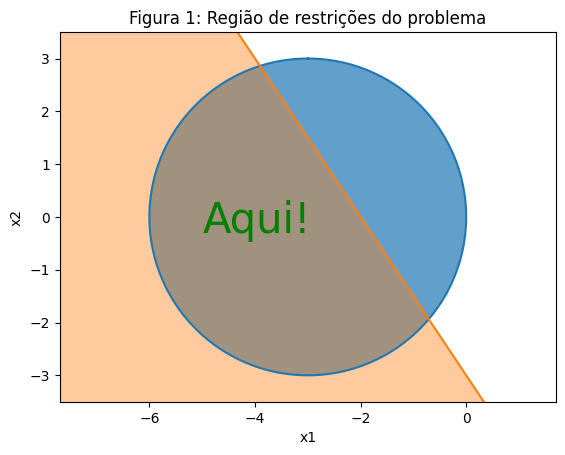

In [99]:
plt.plot(c1_x1, c1_x2)
plt.plot(c2_x1, c2_x2)
plt.text(-5, -0.3, "Aqui!", fontsize=30, color='green')
plt.fill_between(c1_x1, c1_x2, alpha=0.7)
plt.fill_between(c2_x1, c2_x2, -4, alpha=0.4)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis('equal')
plt.xlim([-6.5, 0.5])
plt.ylim([-3.5, 3.5])
plt.title("Figura 1: Região de restrições do problema")
plt.show()

**Plotando a função objetivo:**

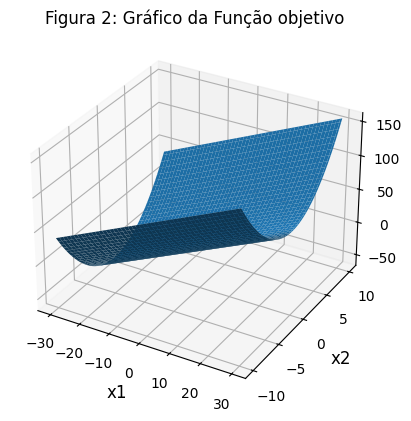

In [100]:
x1 = np.array([np.linspace(-30, 30, 100) for _ in range(100)])
x2 = np.array([np.linspace(-10, 10, 100) for _ in range(100)]).T
z = (2*x1) + (x2**2) - 2

fig = plt.figure()

ax = plt.axes(projection='3d')

ax.plot_surface(x1, x2, z)
ax.set_title("Figura 2: Gráfico da Função objetivo")
ax.set_xlabel('x1', fontsize=12)
ax.set_ylabel('x2', fontsize=12)
plt.show()

**Derivada parcial da função objetivo em relação a $x_{1}$:**

\begin{equation*}
\begin{aligned}
\frac{\partial f(\mathit{\bm{x}})}{\partial x_{1}} = 2 \neq 0
\end{aligned}
\end{equation*}

**Derivada parcial da função objetivo em relação a $x_{2}$:**

\begin{equation*}
\begin{aligned}
\frac{\partial f(\mathit{\bm{x}})}{\partial x_{2}} = 2x_{2} \\
2x_{2} = 0 \implies x_{2} = 0
\end{aligned}
\end{equation*}

**Conclusões em relação ao ponto ótimo:**

Em relação a $x_{2}$, a função chega a seu mínimo quando $x_{2} = 0$.

Em relação a $x_{1}$, desconsiderando restrições, não há um ponto de mínimo: o que se vê é a contribuição de $x_{1}$ para o valor de $f(\mathit{\bm{x}})$ em um comportamento análogo a uma reta crescente, que vai desde $-\inf$ até $+\inf$; isto é, caso seja escolhido um valor constante para $x_{2}$, ao excursionar o valor de $x_{1}$, o comportamento de $f(\mathit{\bm{x}})$ será uma reta crescente.

Por conta da condição de $x_{1}$, a conclusão é de que não há ponto ótimo global.

**Ponto mínimo dentro das restrições:**

Como $x_{1}$ contribui para o valor de $f(\mathit{\bm{x}})$ com um comportamento análogo a uma reta crescente, para minimizar o valor de $f(\mathit{\bm{x}})$ dentro das restrições, devemos escolher o menor valor possível de $x_{1}$.

Com a escolha de $x_{2} = 0$ motivada pelo valor encontrado na derivada primeira, o menor valor possível de $x_{1}$ dentro das restrições é $x_{1} = -6$.

\begin{equation*}
\begin{aligned}
\mathit{\bm{x}} = (-6, 0) \\
f(\mathit{\bm{x}}) = 2x_{1} + x_{2}^{2} - 2 \\
f(\mathit{\bm{x}}) = 2 \cdot (-6) + 0^{2} - 2 \\
f(\mathit{\bm{x}}) = -14
\end{aligned}
\end{equation*}


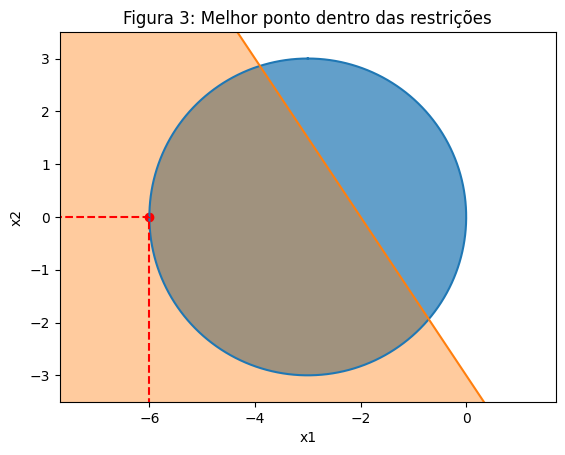

In [101]:
plt.plot(c1_x1, c1_x2)
plt.plot(c2_x1, c2_x2)
plt.fill_between(c1_x1, c1_x2, alpha=0.7)
plt.fill_between(c2_x1, c2_x2, -4, alpha=0.4)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis('equal')
plt.xlim([-6.5, 0.5])
plt.ylim([-3.5, 3.5])
plt.scatter([-6], [0], color='red')
plt.plot([-6, -6], [-4, 0], color='red', linestyle='dashed')
plt.plot([-10, -6], [0, 0], color='red', linestyle='dashed')
plt.title("Figura 3: Melhor ponto dentro das restrições")
plt.show()

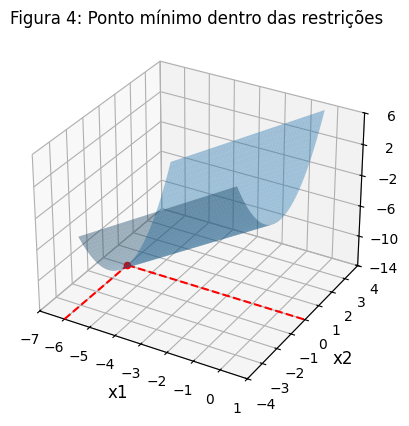

In [102]:
x1 = np.array([np.linspace(-6, 0, 100) for _ in range(100)])
x2 = np.array([np.linspace(-3, 3, 100) for _ in range(100)]).T
z = (2*x1) + (x2**2) - 2

fig = plt.figure()

ax = plt.axes(projection='3d')

ax.plot_surface(x1, x2, z, alpha=0.4)
ax.scatter3D(-6, 0, -14, color='red')
ax.plot([-6, 1], [-0, 0], [-14, -14], color='red', linestyle='dashed')
ax.plot([-6, -6], [-4, 0], [-14, -14], color='red', linestyle='dashed')
ax.set_title("Figura 4: Ponto mínimo dentro das restrições")
ax.set_xlabel('x1', fontsize=12)
ax.set_ylabel('x2', fontsize=12)
ax.set_xlim([-7, 1])
ax.set_ylim([-4, 4])
ax.set_zlim([-14, 6])
ax.set_zticks([-14, -10, -6, -2, 2, 6])
plt.show()